<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/GM_corn_analysis_with_normalised_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1301]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Cleaning and combining initial data (corn yield, acreage, are, GM corn %, Agricultural GDP)

!mkdir datafinal
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/real%20gdp%20by%20state%20agriculture.csv -o ./datafinal/real_gdp_by_state_agriculture.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/alltablesGEcrops.csv -o ./datafinal/GM_crops_%.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/final%20corn%20data.csv -o ./datafinal/final_corn_data.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/Total%20crop%20acreage.csv -o ./datafinal/Total_crop_acreage.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/acres%20operated%20by%20state.csv -o ./datafinal/acres_operated_by_state.csv

!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/employment%20and%20wage%20agri.csv -o ./datafinal/employment_and_wage_agri.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/EXPORTS.csv -o ./datafinal/exports.csv

In [1302]:
gm_crops = pd.read_csv('/content/GM crops %.csv')

In [1303]:
corn = pd.read_csv('/content/final corn data.csv')

In [1304]:
gdp_agri = pd.read_csv('/content/real gdp by state agriculture.csv')

Other values are also saved as dataframes, which will be used to normalise agricultural GDP and to see which other ones contribute to agricultural GDP other than GM corn production

In [1305]:
crops_planted_acreage =pd.read_csv('/content/Total crop acreage.csv')

In [1306]:
acres_operated = pd.read_csv('/content/acres operated by state.csv')

In [1307]:
jobs_and_wage = pd.read_csv('/content/employment and wage agri.csv')

In [1308]:
exports = pd.read_csv('/content/EXPORTS.csv')

In [1309]:
population = pd.read_csv('/content/population by state.csv')

Cleaning the GM crop and corn data, merging them together

In [1310]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [1311]:
#gm_crops=gm_crops.drop(columns='Table')

In [1312]:
gm_crops["Value"].replace({".": "0"}, inplace=True)
gm_crops["Value"].replace({"*": "0"}, inplace=True)

In [1313]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value        object
dtype: object

In [1314]:
gm_crops["Value"] = gm_crops["Value"].astype(float).astype(int)

In [1315]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

In [1316]:
corn.head()

,Year,State,Unnamed: 2,Area planted,Area harvested for grain,Yield,Production
0,2005,Alabama,NaN,220,200,119,23800
1,2005,Arizona,NaN,50,22,195,4290
2,2005,Arkansas,NaN,240,230,131,30130
3,2005,California,NaN,560,130,172,22360
4,2005,Colorado,NaN,1100,950,148,140600


In [1317]:
corn=corn.drop(columns='Unnamed: 2')

In [1318]:
corn.dtypes

Year                         int64
State                       object
Area planted                 int64
Area harvested for grain    object
Yield                       object
Production                  object
dtype: object

In [1319]:
corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True) 
corn["Area harvested for grain"].replace({"": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"": "0"}, inplace=True)


In [1320]:
corn["Area harvested for grain"].replace({"NA": "0"}, inplace=True) 

In [1321]:
corn["Area harvested for grain"].replace({"inf": "0"}, inplace=True) 

In [1322]:
corn = corn.fillna(0)

In [1323]:
corn["Area harvested for grain"].astype(float).astype(int)

0        200
1         22
2        230
3        130
4        950
       ...  
730       90
731       38
732     2680
733       67
734    81482
Name: Area harvested for grain, Length: 735, dtype: int64

In [1324]:
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [1325]:
gm_crops['Attribute'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'U.S.', 'Alabama',
       'Arkansas', 'California', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'Tennessee'], dtype=object)

In [1326]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas ', 'California', 'Colorado ',
       'Connecticut ', 'Delaware', 'Florida ', 'Georgia ', 'Idaho ',
       'Illinois ', 'Indiana', 'Iowa ', 'Kansas ', 'Kentucky ',
       'Louisiana', 'Maine ', 'Maryland ', 'Massachusetts ', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri ', 'Montana ', 'Nebraska',
       'Nevada ', 'New Hampshire ', 'New Jersey ', 'New Mexico ',
       'New York ', 'North Carolina', 'North Dakota ', 'Ohio ',
       'Oklahoma', 'Oregon ', 'Pennsylvania ', 'Rhode Island ',
       'South Carolina', 'South Dakota ', 'Tennessee ', 'Texas ', 'Utah ',
       'Vermont ', 'Virginia ', 'Washington', 'West Virginia ',
       'Wisconsin ', 'Wyoming ', 'United States'], dtype=object)

In [1327]:
corn['State'].replace({'Arkansas ': 'Arkansas'}, inplace=True)

In [1328]:
corn['State'].replace({'Colorado ': 'Colorado', 'Connecticut ':'Conneticut', 'Florida ':'Florida','Georgia ':'Georgia', 'Idaho ':'Idaho', 'Illinois ':'Illinois', 'Iowa ':'Iowa','Kansas ':'Kansas','Kentucky ':'Kentucky', 'Maine ':'Maine', 'Massachusetts ':'Massachusetts','Missouri ':'Missouri','North Dakota ':'North Dakota','Ohio ':'Ohio','South Dakota ':'South Dakota','Texas ':'Texas', 'Wisconsin ':'Wisconsin'}, inplace=True)

In [1329]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Conneticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland ', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana ', 'Nebraska', 'Nevada ',
       'New Hampshire ', 'New Jersey ', 'New Mexico ', 'New York ',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon ',
       'Pennsylvania ', 'Rhode Island ', 'South Carolina', 'South Dakota',
       'Tennessee ', 'Texas', 'Utah ', 'Vermont ', 'Virginia ',
       'Washington', 'West Virginia ', 'Wisconsin', 'Wyoming ',
       'United States'], dtype=object)

In [1330]:
corn['State'].replace({'Maryland ': 'Maryland', 'Nevada ':'Nevada','New Hampshire ':'New Hampshire', 'New Jersey ':'New Jersey','New Mexico ':'New Mexico', 'New York ':'New York', 'Oregon ':'Oregon','Pennsylvania ':'Pennsylvania','Rhode Island ':'Rhode Island', 'Tennessee ':'Tennessee','Utah ':'Utah','Vermont ':'Vermont','Virginia ':'Virginia','West Virginia ':'West Virginia','Wyoming ':'Wyoming'}, inplace=True)

In [1331]:
gm_crops['Attribute'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'U.S.', 'Alabama',
       'Arkansas', 'California', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'Tennessee'], dtype=object)

In [1333]:
gm_crops.tail(50)

,Table,Unit,Variety,Year,Attribute,Value
2890,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2017,Other States,94
2891,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2017,U.S.,94
2892,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Arkansas,97
2893,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Illinois,93
2894,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Indiana,91
2895,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Iowa,95
2896,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Kansas,95
2897,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Michigan,93
2898,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Minnesota,95
2899,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Mississippi,99


In [1334]:
gm_crops = gm_crops[gm_crops['Variety']=='All GE varieties']

In [1335]:
gm_crops[gm_crops['Year']== 2005]

,Table,Unit,Variety,Year,Attribute,Value
1020,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Illinois,36
1021,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Indiana,26
1022,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Iowa,60
1023,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Kansas,63
1024,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Michigan,40
1025,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Minnesota,66
1026,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Missouri,55
1027,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Nebraska,69
1028,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,North Dakota,75
1029,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Ohio,18


In [1336]:
gm_2005 = gm_crops[gm_crops['Year']== 2005]

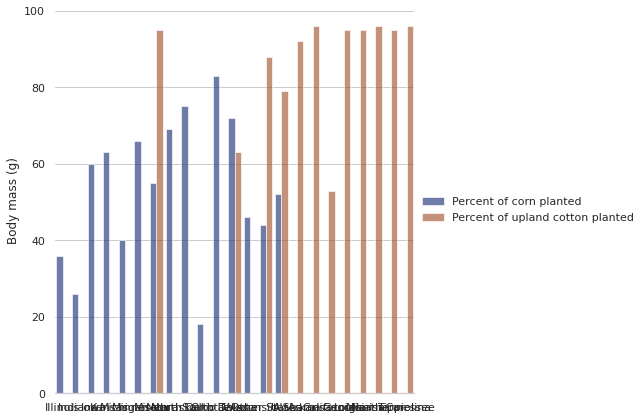

In [1337]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=gm_2005, kind="bar",
    x="Attribute", y="Value", hue="Unit",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

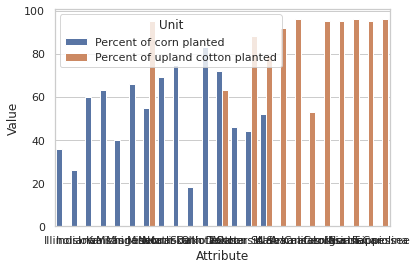

In [1338]:
ax = sns.barplot(x="Attribute", y="Value", hue="Unit", data=gm_2005)

In [ ]:
gm_corn = gm_crops[(gm_crops['Unit']=='Percent of corn planted')&(gm_crops['Variety']=='All GE varieties')]

In [ ]:
gm_corn["Attribute"].replace({"U.S.": "United States"}, inplace=True) 

In [ ]:
gm_corn["Attribute"].unique()

In [ ]:
corn['State'].unique()

---

# Merging data for corn table

Next step is to merge all the dataframes and calculate the actual level of GM crop area by multiplying the percentage and the total corn area planted

In [ ]:
corn_table = corn.merge(gm_corn, how='inner', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [ ]:
corn_table_final = corn.merge(gm_corn, how='outer', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [ ]:
corn_table_final.tail(50)

In [ ]:
corn_table_clean = corn_table_final[(corn_table_final['Year']>=2005) & (corn_table_final['Year']!=2020)]

In [ ]:
corn_table_clean.drop(columns=['Table','Unit', 'Variety'], inplace=True)

In [ ]:
corn_table_clean.loc[corn_table_clean.Attribute == 'Other States']
                     

In [ ]:
i = corn_table_clean.loc[810, 'Value']

In [ ]:
corn_table_clean.loc[corn_table_clean.Year == 2005, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2005, 'Value'].fillna(i)

In [ ]:
i1 = corn_table_clean.loc[811, 'Value']
i2 = corn_table_clean.loc[812, 'Value']
i3 = corn_table_clean.loc[813, 'Value']
i4 = corn_table_clean.loc[814, 'Value']
i5 = corn_table_clean.loc[815, 'Value']
i6 = corn_table_clean.loc[816, 'Value']
i7 = corn_table_clean.loc[817, 'Value']
i8 = corn_table_clean.loc[818, 'Value']
i9 = corn_table_clean.loc[819, 'Value']
i10 = corn_table_clean.loc[820, 'Value']
i11 = corn_table_clean.loc[821, 'Value']
i12 = corn_table_clean.loc[822, 'Value']
i13 = corn_table_clean.loc[823, 'Value']
i14 = corn_table_clean.loc[824, 'Value']

corn_table_clean.loc[corn_table_clean.Year == 2006, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2006, 'Value'].fillna(i1)
corn_table_clean.loc[corn_table_clean.Year == 2007, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2007, 'Value'].fillna(i2)
corn_table_clean.loc[corn_table_clean.Year == 2008, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2008, 'Value'].fillna(i3)
corn_table_clean.loc[corn_table_clean.Year == 2009, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2009, 'Value'].fillna(i4)
corn_table_clean.loc[corn_table_clean.Year == 2010, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2010, 'Value'].fillna(i5)
corn_table_clean.loc[corn_table_clean.Year == 2011, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2011, 'Value'].fillna(i6)
corn_table_clean.loc[corn_table_clean.Year == 2012, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2012, 'Value'].fillna(i7)
corn_table_clean.loc[corn_table_clean.Year == 2013, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2013, 'Value'].fillna(i8)
corn_table_clean.loc[corn_table_clean.Year == 2014, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2014, 'Value'].fillna(i9)
corn_table_clean.loc[corn_table_clean.Year == 2015, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2015, 'Value'].fillna(i10)
corn_table_clean.loc[corn_table_clean.Year == 2016, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2016, 'Value'].fillna(i11)
corn_table_clean.loc[corn_table_clean.Year == 2017, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2017, 'Value'].fillna(i12)
corn_table_clean.loc[corn_table_clean.Year == 2018, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2018, 'Value'].fillna(i13)
corn_table_clean.loc[corn_table_clean.Year == 2019, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2019, 'Value'].fillna(i14)

In [ ]:
corn_table_clean.drop(index=[810,811,812,813,814,815,816,817,818, 819,820, 821, 822, 823, 824], axis =0, inplace=True)

In [ ]:
corn_table_clean.drop(columns='Attribute', inplace=True)

In [ ]:
corn_table_clean["Area planted"] = corn_table_clean["Area planted"].astype(float).astype(int)
corn_table_clean["Area harvested for grain"] = corn_table_clean["Area harvested for grain"].astype(float).astype(int)
corn_table_clean["Yield"] = corn_table_clean["Yield"].astype(float).astype(int)
corn_table_clean["Production"] = corn_table_clean["Production"].astype(float).astype(int)
corn_table_clean["Value"] = corn_table_clean["Value"].astype(float).astype(int)


In order to multiply the percentage by the total area to get the GM corn area, I divided the percenatage to get a decimal and added another column

In [ ]:
corn_table_clean['Value'] = corn_table_clean['Value'].div(100).round(2)

In [ ]:
corn_table['Value'] = corn_table['Value'].div(100).round(2)

In [ ]:
corn_table_clean["GM corn area"] = corn_table_clean["Area planted"] * corn_table_clean["Value"]

In [ ]:
corn_table["GM corn area"] = corn_table["Area planted"] * corn_table["Value"]

To have the variables in their initial values (in the orginal dataset they were divided by 1000)

In [ ]:
corn_table_clean['GM corn area'] = corn_table_clean['GM corn area']*1000
corn_table_clean['Production'] = corn_table_clean['Production']*1000
corn_table_clean['Area planted'] = corn_table_clean['Area planted']*1000
corn_table_clean['Area harvested for grain'] = corn_table_clean['Area harvested for grain']*1000

---

In [ ]:
gdp_agri.head()

In [ ]:
gdp_agri.dtypes

In [ ]:
gdp_agri["Agri GDP"] = gdp_agri["Agri GDP"].astype(int)

In [ ]:
corn_table = corn_table.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
data_all_states = corn_table_clean.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
data_all_states.drop(columns='Value', inplace=True)

In [ ]:
data_all_states['Agri GDP'] = data_all_states['Agri GDP']*1000000

In [ ]:
corn_general = corn_table[(corn_table['State']=='United States')]

data_all_states["Value"] = data_all_states["Value"].astype(float).astype(int)

In [ ]:

data_all_states["GM corn area"] = data_all_states["GM corn area"].astype(float).astype(int)

Export the second dataframe (data_all_states), which has estimated values to use in other google colabs

In [ ]:
data_all_states.to_csv('/content/sample_data/data_all_states.csv')

# Exploratory analysis with scatterplots

In [ ]:
corn_table1 = corn_table[corn_table['State']!='United States']

In [ ]:
corn_table1 = corn_table1[corn_table1['State']!='Texas']

In [ ]:
corn_general.plot(x= 'Year', y = 'Agri GDP')

In [ ]:
corn_general.plot(x= 'Year', y = 'GM corn area')

In [ ]:
corn_general.plot(x= 'Year', y = 'Production')

In [ ]:
corn_general.plot(x= 'Year', y = 'Yield')

In [ ]:
corn_general.plot(x= 'Year', y = 'Area planted')

In [ ]:
corn_general.plot.scatter(x= 'GM corn area', y = 'Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Agri GDP')

In [ ]:
corn_table1.plot.scatter(x='GM corn area', y ='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Production', y ='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Yield', y ='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area planted', y ='Agri GDP')

In [ ]:
corn_table.dtypes

In [ ]:
corn_table["Area harvested for grain"] = corn_table["Area harvested for grain"].astype(float).astype(int)

In [ ]:
corn_table["Value"] = corn_table["Value"].astype(float).astype(int)
corn_table["GM corn area"] = corn_table["GM corn area"].astype(float).astype(int)

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area harvested for grain', y ='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Yield')

In [ ]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Production')

---

# Corn descriptive statistics

In [ ]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','Agri GDP')

In [ ]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','GM corn area')

In [ ]:
corn[corn['Year']==2019][corn['State']!='United States'].plot.bar('State','Area planted')

In [ ]:
gdp_agri.dtypes

In [ ]:
gdp_agri['Year'].max()

In [ ]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']!='United States')].plot.bar('State','Agri GDP')

In [ ]:
gdp_agri.groupby(['Year', 'State']).count().sort_values(ascending=False, by ='Agri GDP')

In [ ]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']=='Far West')]

---

Checking correlation just for 1 year

In [ ]:
corn_table1[corn_table1['Year']==2016].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

In [ ]:
corn_table1[corn_table1['Year']==2005].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

---

Checking for correlations

# Checking for correlations for initial variables

In [ ]:
corn_table[corn_table['State']!='United States'].corr()

In [ ]:
import seaborn as sns

In [ ]:
corn_for_cor=corn_table1.drop(columns='Year')

In [ ]:
corn_for_cor=corn_table1.drop(columns='Value')

In [ ]:
corn_for_cor=corn_for_cor.drop(columns='Year')

In [ ]:
corn_for_cor.corr()

In [ ]:
sns.heatmap(corn_for_cor[corn_for_cor['State']!='United States'].corr(), cmap="YlOrBr")

---

# More Descriptive stats

In [ ]:
corn_table1.hist(column='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].hist(column='Agri GDP')

In [ ]:
corn_table[corn_table['State']!='United States'].hist(column='GM corn area')

In [ ]:
g = sns.FacetGrid(corn_table, col="State", sharex=False)
g.map(sns.boxplot, 'Agri GDP')

---

# Scatter plots for each state

Doing correlations within each state

In [ ]:
corn_table[corn_table['State']=='United States'].plot.scatter('GM corn area','Agri GDP')

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Illinois']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Indiana']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Iowa']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Kansas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Michigan']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Minnesota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Missouri']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Nebraska']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='North Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Ohio']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='South Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table[corn_table['State']=='Texas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Wisconsin']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(10,10))
corn_table[corn_table['State']=='Illinois'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,0])
axes[0,0].set_title('Illinois corr:0.624')
corn_table[corn_table['State']=='Indiana'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,1])
axes[0,1].set_title('Indiana corr:0.614')
corn_table[corn_table['State']=='Iowa'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,2])
axes[0,2].set_title('Iowa corr:0.598')
corn_table[corn_table['State']=='Kansas'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,0])
axes[1,0].set_title('Kansas corr:0.527')
corn_table[corn_table['State']=='Michigan'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,1])
axes[1,1].set_title('Michigan corr:0.610')
corn_table[corn_table['State']=='Minnesota'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,2])
axes[1,2].set_title('Minnesota corr:0.634')
corn_table[corn_table['State']=='Missouri'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,0])
axes[2,0].set_title('Missouri corr:0.604')
corn_table1[corn_table1['State']=='Nebraska'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,1])
axes[2,1].set_title('Nebraska corr:0.641')
corn_table1[corn_table1['State']=='North Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,2])
axes[2,2].set_title('North Dakota corr:0.603')
corn_table1[corn_table1['State']=='Ohio'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,0])
axes[3,0].set_title('Ohio corr:0.691')
corn_table1[corn_table1['State']=='South Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,1])
axes[3,1].set_title('South Dakota corr:0.590')
corn_table[corn_table['State']=='Texas'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,2])
axes[3,2].set_title('Texas corr:0.614')
corn_table1[corn_table1['State']=='Wisconsin'].plot.scatter('GM corn area','Agri GDP', ax=axes[4,0])
axes[4,0].set_title('Wisconsin corr:0.565')

plt.tight_layout()
fig.show()

---

# Panel regression or timeseries regression?

In [ ]:
regression = corn_table.set_index(["State"])

In [ ]:
regression=pd.to_datetime(regression.Year, format='%Y')

In [ ]:
regression1 = corn_table.set_index(["State", "Year"])

In [ ]:
!pip install linearmodels
from linearmodels import PanelOLS
PanelOLS(regression1['Agri GDP'],regression1['GM corn area'], entity_effects=True, time_effects=True)

In [ ]:
mod = PanelOLS(regression1['Agri GDP'],regression1['GM corn area'], entity_effects=True, time_effects=True)


In [ ]:
print(mod)

---

# Normalising Agriculture GDP and repeating the analysis

Normalising the GDP, first add and clean the acreage operated per state to the Agriculture GDP dataframe and then divide the Agri GDP by that acreage to have the normalised_gdp_agri

In [ ]:
acres_operated.head()

In [ ]:
acres_operated =acres_operated.drop(columns="Unnamed: 5")

In [ ]:
acres_operated =acres_operated.drop(columns="Unnamed: 6")

In [ ]:
acres_operated.dtypes

In [ ]:
gdp_agri.head()

In [ ]:
acres_operated = acres_operated.drop(columns="Period")
acres_operated = acres_operated.drop(columns="Data Item")


In [ ]:
nor_gdp_agri = gdp_agri.merge(acres_operated, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
norm_data_all_states = data_all_states.merge(acres_operated, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
norm_data_all_states.head()

In [ ]:
norm_data_all_states["Normalised Agri GDP"] = norm_data_all_states["Agri GDP"] / norm_data_all_states["Value"]
norm_data_all_states["N_Area_planted"] = norm_data_all_states["Area planted"] / norm_data_all_states["Value"]
norm_data_all_states["N_Area_harvested"] = norm_data_all_states["Area harvested for grain"] / norm_data_all_states["Value"]
norm_data_all_states["N_Production"] = norm_data_all_states["Production"] / norm_data_all_states["Value"]
norm_data_all_states["N_GM_corn_area"] = norm_data_all_states["GM corn area"] / norm_data_all_states["Value"]

Add new column with the normalised GDP

In [ ]:
nor_gdp_agri["Normalised Agri GDP"] = nor_gdp_agri["Agri GDP"] / nor_gdp_agri["Value"]

In [ ]:
nor_gdp_agri

In [ ]:
nor_gdp_agri=nor_gdp_agri.drop(columns='Agri GDP')
nor_gdp_agri=nor_gdp_agri.drop(columns='Value')

In [ ]:
corn_table.head()

In [ ]:
nor_corn_table = corn_table.merge(nor_gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
nor_corn_table=nor_corn_table.drop(['Table','Variety','Unit','Value'], axis=1)

In [ ]:
nor_corn_table[nor_corn_table['Normalised Agri GDP']>0.0003]

In [ ]:
nor_corn_table.plot.hexbin(y='Normalised Agri GDP', x='GM corn area', gridsize=15)

In [ ]:
nor_corn_table.plot.scatter(y='Normalised Agri GDP', x='GM corn area' )


In [ ]:
nor_corn_table['State'].unique()

In [ ]:
# library & dataset
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="GM corn area", y="Normalised Agri GDP", data=nor_corn_table, fit_reg=False, hue='State', legend=False, palette=sns.color_palette("Set3", 13))
 
# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 
#sns.plt.show()


# Adding other variables to perform the regression

Then, I will add some other variables that may affect the Agricultural GDP other than GM crop production, and use them as control variables

Checking the correlation between Field crop totals and the agricultural GDP, to see whether the crops levels overall create the same linear relationship

In [ ]:
crops_planted_acreage.rename({'Value':'All crops planted acreage'}, inplace=True)

In [ ]:
crops_planted_acreage.head()

In [ ]:
nor_corn_table.head()

In [ ]:
jobs_and_wage.head()

In [ ]:
jobs_and_wage.dtypes

In [ ]:
jobs_and_wage.replace({"**": "0"}, inplace=True)

In [ ]:
jobs_and_wage.replace({"NaN": "0"}, inplace=True)

In [ ]:
jobs_and_wage.replace({"*": "0"}, inplace=True)

In [ ]:
jobs_and_wage["TOT_EMP"] = jobs_and_wage["TOT_EMP"].astype(float).astype(int)
jobs_and_wage["H_MEAN"] = jobs_and_wage["H_MEAN"].astype(float).astype(int)
jobs_and_wage["A_MEAN"] = jobs_and_wage["A_MEAN"].astype(float).astype(int)
jobs_and_wage["H_MEDIAN"] = jobs_and_wage["H_MEDIAN"].astype(float).astype(int)
jobs_and_wage["A_MEDIAN"] = jobs_and_wage["A_MEDIAN"].astype(float).astype(int)

In [ ]:
jobs_and_wage.dtypes

In [ ]:
jobs_and_wage=jobs_and_wage.merge(population, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [ ]:
jobs_and_wage.head()

In [ ]:
exports.columns

In [ ]:
exports.dtypes

In [ ]:
exports["Agri exports "] = exports["Agri exports "].astype(float).astype(int)
exports["Corn exports"] = exports["Corn exports"].astype(float).astype(int)

TABLE WITH AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [ ]:
gdp_agri.head()

In [ ]:
all_states = gdp_agri.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [ ]:
all_states = all_states.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [ ]:
all_states = all_states.merge(crops_planted_acreage, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [ ]:
all_states = all_states.merge(acres_operated, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [ ]:
all_states.head()

TABLE WITH CORN; GM CORN; AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [ ]:
nor_corn_table = nor_corn_table.merge(crops_planted_acreage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [ ]:
nor_corn_table = nor_corn_table.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [ ]:
nor_corn_table = nor_corn_table.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [ ]:
norm_data_all_states = norm_data_all_states.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])
norm_data_all_states = norm_data_all_states.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [ ]:
norm_data_all_states.head()

In [ ]:
nor_corn_table.drop(columns=['Attribute', 'States', 'Period', 'Data Item', 'STATE', 'State_y'], inplace=True)

In [ ]:
norm_data_all_states.drop(columns=[ 'States', 'JOBS_1000', 'STATE', 'State_y'], inplace=True)

In [ ]:
norm_data_all_states.rename({'Value':'All crops planted acreage'}, inplace=True, axis=1)

In [ ]:
nor_corn_table.rename({'Value':'All crops planted acreage'}, inplace=True, axis=1)

In [ ]:
norm_data_all_states['OCC_TITLE'].replace({"Farmers, Ranchers, and Other Agricultural Managers": "Farm, ranch, and other agricultural managers"}, inplace=True)

In [ ]:
norm_data_all_states['Agri exports '] = norm_data_all_states['Agri exports ']*1000000
norm_data_all_states['Corn exports'] = norm_data_all_states['Corn exports']*1000000

In [ ]:
nor_corn_table['OCC_TITLE'].replace({"Farmers, Ranchers, and Other Agricultural Managers": "Farm, ranch, and other agricultural managers"}, inplace=True)

In [ ]:
norm_data_all_states['OCC_TITLE'].replace({'Agricultural Workers, All Other':'Agricultural workers, all other'}, inplace=True)

In [ ]:
nor_corn_table['Agri GDP'] = nor_corn_table['Agri GDP']*1000000
nor_corn_table['Normalised Agri GDP'] = nor_corn_table['Normalised Agri GDP']*1000000
nor_corn_table['Area planted'] = nor_corn_table['Area planted']*1000
nor_corn_table['Area harvested for grain'] = nor_corn_table['Area harvested for grain']*1000

In [ ]:
nor_corn_table['GM corn area'] = nor_corn_table['GM corn area']*1000

In [ ]:
nor_corn_table['Agri exports '] = nor_corn_table['Agri exports ']*1000000
nor_corn_table['Corn exports'] = nor_corn_table['Corn exports']*1000000

In [ ]:
nor_corn_table['Production'] = nor_corn_table['Production']*1000

In [ ]:
nor_corn_table['Normalised Agri GDP'].round(2)

In [ ]:
norm_data_all_states

In [ ]:
len(nor_corn_table[(nor_corn_table['TOT_EMP']==0) & (nor_corn_table['OCC_TITLE']=='Agricultural workers, all other')])

In [ ]:
nor_corn_table = nor_corn_table[nor_corn_table['OCC_TITLE']=='Farm, ranch, and other agricultural managers']

In [ ]:
norm_data_all_states = norm_data_all_states[norm_data_all_states['OCC_TITLE']=='Agricultural workers, all other']

In [ ]:
norm_data_all_states.head()

Changing missing values (0) in employment and wage to the mean so we can do the regression

In [ ]:
mean_tot_emp = nor_corn_table[nor_corn_table['TOT_EMP']>0]['TOT_EMP'].median()

nor_corn_table['TOT_EMP'][nor_corn_table['TOT_EMP']==0] = mean_tot_emp

In [ ]:
mean_tot_emp1 = norm_data_all_states[norm_data_all_states['TOT_EMP']>0]['TOT_EMP'].median()

norm_data_all_states['TOT_EMP'][norm_data_all_states['TOT_EMP']==0] = mean_tot_emp1

In [ ]:
mean_tot_emp = nor_corn_table[nor_corn_table['TOT_EMP']>0]['TOT_EMP'].median()

nor_corn_table['TOT_EMP'][nor_corn_table['TOT_EMP']==0] = mean_tot_emp

In [ ]:
mean_hour_wage = nor_corn_table[nor_corn_table['H_MEAN']>0]['H_MEAN'].mean()

nor_corn_table['H_MEAN'][nor_corn_table['H_MEAN']==0] = mean_hour_wage

In [ ]:
mean_ann_wage = nor_corn_table[nor_corn_table['A_MEAN']>0]['A_MEAN'].mean()

nor_corn_table['A_MEAN'][nor_corn_table['A_MEAN']==0] = mean_ann_wage

In [ ]:
mean_med_h_wage = nor_corn_table[nor_corn_table['H_MEDIAN']>0]['H_MEDIAN'].mean()

nor_corn_table['H_MEDIAN'][nor_corn_table['H_MEDIAN']==0] = mean_med_h_wage

In [ ]:
mean_med_a_wage = nor_corn_table[nor_corn_table['A_MEDIAN']>0]['A_MEDIAN'].mean()

nor_corn_table['A_MEDIAN'][nor_corn_table['A_MEDIAN']==0] = mean_med_a_wage

In [ ]:
nor_corn_table = nor_corn_table.round(5)

Making sure all categorical values are the same

In [ ]:
norm_data_all_states

In [ ]:
norm_data_all_states.rename({'All crops planted acreage':'Acres operated in agriculture'}, inplace=True, axis=1)

In [ ]:
norm_data_all_states['N_TOT_EMP_1000'] = norm_data_all_states['TOT_EMP'] / norm_data_all_states['Population']

In [ ]:
norm_data_all_states['N_TOT_EMP_1000'] = norm_data_all_states['N_TOT_EMP_1000'] * 1000

In [ ]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['TOT_EMP'] / nor_corn_table['Population']

In [ ]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['N_TOT_EMP_1000'] * 1000

In [ ]:
nor_corn_table=nor_corn_table.merge(acres_operated, left_on=['Year', 'State_x'], right_on=['Year', 'State'])

In [ ]:
nor_corn_table.rename({'Value':'Acres operated in agriculture'}, inplace=True, axis=1)

In [ ]:
nor_corn_table.drop(columns='State', inplace=True)

In [ ]:
nor_corn_table['log_TOT_EMP'] = np.log10(nor_corn_table['TOT_EMP'])

In [ ]:
norm_data_all_states['log_TOT_EMP'] = np.log10(norm_data_all_states['TOT_EMP'])

In [ ]:
norm_data_all_states['N_agri_exports'] = norm_data_all_states['Agri exports '] / norm_data_all_states['Acres operated in agriculture']

norm_data_all_states['N_corn_exports'] = norm_data_all_states['Corn exports'] / norm_data_all_states['Acres operated in agriculture']

In [ ]:
nor_corn_table['N_GM_corn_area '] = nor_corn_table['GM corn area'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_agri_exports'] = nor_corn_table['Agri exports '] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_corn_exports'] = nor_corn_table['Corn exports'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table = nor_corn_table.round(5)

In [ ]:
nor_corn_table.to_csv('final_data_table.csv')

In [ ]:
norm_data_all_states.to_csv('final_data_all_states.csv')

In [ ]:
nor_corn_table.set_index('Year', inplace=True)

In [ ]:
import pandas as pd
from sklearn import preprocessing
cols_to_norm = ['Normalised Agri GDP','N_GM_corn_area', 'N_agri_exports', 'N_TOT_EMP_1000', 'Yield', 'log_TOT_EMP']
min_max_scaler = preprocessing.MinMaxScaler()
norm_data_all_states[cols_to_norm] = min_max_scaler.fit_transform(norm_data_all_states[cols_to_norm])

In [ ]:
import pandas as pd
from sklearn import preprocessing
cols_to_norm = ['Normalised Agri GDP','N_GM_corn_area ', 'N_agri_exports', 'N_TOT_EMP_1000', 'H_MEAN', 'A_MEAN', 'Yield', 'log_TOT_EMP']
min_max_scaler = preprocessing.MinMaxScaler()
nor_corn_table[cols_to_norm] = min_max_scaler.fit_transform(nor_corn_table[cols_to_norm])


In [ ]:
norm_data_all_states.round(4)

---

# Regression and final visualisations

In [ ]:
nor_corn_table.columns

In [ ]:
nor_corn_table.rename(columns={'Normalised Agri GDP':'N_Agri_GDP'}, inplace=True)

In [ ]:
norm_data_all_states.rename(columns={'Normalised Agri GDP':'N_Agri_GDP'}, inplace=True)

In [ ]:
nor_corn_table.rename(columns={'N_GM_corn_area ':'N_GM_corn_area'}, inplace=True)

Source:  https://www.statology.org/durbin-watson-test-python/

Before doing the linear regression, since the data is a time series it is important to check whether the data is autocorrelated, that would make it unsuitable for the linear regression. If the Durbin-Watson test lies between 1.5 and 2.5, then it is considered normal.

In [ ]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model1 = ols('N_Agri_GDP ~ N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model1.summary())

In [ ]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('N_Agri_GDP ~ log_TOT_EMP + Yield + N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model.summary())

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
nor_corn_table.columns

In [ ]:
Features = ['N_GM_corn_area', 'log_TOT_EMP', 'Yield']
X = nor_corn_table[Features]
y = nor_corn_table['N_Agri_GDP']

Removed 'N_agri_exports'

In [ ]:
reg = LinearRegression().fit(X,y)

In [ ]:
np.round(reg.coef_, 6)

In [ ]:
reg.score(X,y)

In [ ]:
y_pred = reg.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'      
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'     
      % r2_score(y, y_pred)) 

In [ ]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show() 

In [ ]:
sns.pairplot(nor_corn_table[Features+['N_Agri_GDP']])

In [ ]:
sns.heatmap(nor_corn_table[Features+['N_Agri_GDP']].corr())

In [ ]:
nor_corn_table[Features+['N_Agri_GDP']]

In [ ]:
Features = ['N_GM_corn_area', 'log_TOT_EMP', 'Yield','N_agri_exports']

In [ ]:
sns.set_style('whitegrid') 
for f in Features:
  print(f)
  sns.lmplot(x=f, y='N_Agri_GDP', data=nor_corn_table)

In [ ]:
norm_data_all_states_05 = norm_data_all_states[norm_data_all_states['Year'] == 2005]

In [ ]:

norm_data_all_states_09 = norm_data_all_states[norm_data_all_states['Year'] == 2009]
norm_data_all_states_13 = norm_data_all_states[norm_data_all_states['Year'] == 2013]
norm_data_all_states_17 = norm_data_all_states[norm_data_all_states['Year'] == 2017]
norm_data_all_states_19 = norm_data_all_states[norm_data_all_states['Year'] == 2019]

In [ ]:

norm_data_all_states_09.plot(x='N_GM_corn_area', y='N_GM_corn_area')